In [53]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np

from mpl_toolkits import mplot3d

In [2]:
t2E = lambda e, t : fsolve(lambda E : E - e*np.sin(E) - t, t/(1 - e))

In [157]:
e = .7 # eccentricity
n = 1000 # plot points
t = np.linspace(0, 10, n)
E = t2E(e, t)
x = np.cos(E) - e
y = np.sin(E)

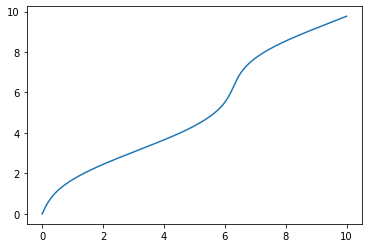

In [158]:
plt.plot(t, E)

In [159]:
def compute_eccentricity1(E, ell, m, mu):
    # E is the orbital energy
    # ell is the angular momentum
    # m is
    # mu is
    e = np.sqrt( 1 + ( (2*E*ell**2) / (m**3*mu**2) ) )
    return e   

def compute_eccentricity2(a,b):
    # a - semi-major axis
    # b - semi-minor axis
    e = np.sqrt( 1 - ( (b**2) / (a**2) ) )
    return e  

In [160]:
def compute_time(E,e,a):
    # 398600.4 is a gravitational parameter
    t = a * np.sqrt( a / 398600.4 ) * (E - e * np.sin(E))
    return t

In [161]:
a = 4
b = 1.5

u = a * (np.cos(E) - e)
v = b * np.sin(E)

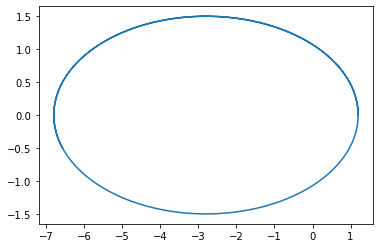

In [162]:
plt.plot(u,v)

In [165]:
theta = 87
lamb = 24

n = [np.cos(lamb) * np.sin(theta), np.sin(lamb) * np.sin(theta), np.cos(theta)]
k = [0,0,1]

P = np.cross(n,k)
Q = np.cross(n,P)

In [166]:
X = u*P[0] + v*Q[0]
Y = u*P[1] + v*Q[1]
Z = u*P[2] + v*Q[2]

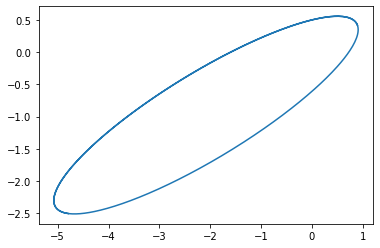

In [167]:
plt.plot(X,Y)

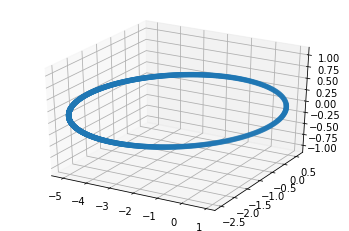

In [169]:
ax = plt.axes(projection='3d')
ax.scatter3D(X,Y,Z)

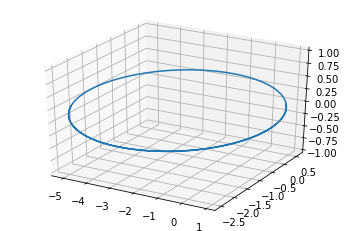

In [170]:
ax = plt.axes(projection='3d')
ax.plot3D(X,Y,Z)

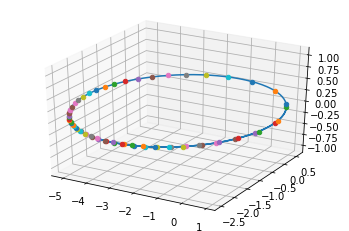

In [174]:
ax = plt.axes(projection='3d')
ax.plot3D(X,Y,Z)
for i in range(0,np.size(X),15):
    ax.scatter3D(X[i],Y[i],Z[i])
plt.show()

In [188]:
@widgets.interact_manual( t = (1, np.size(X), 1), color=['blue', 'red', 'green'])
   
def plot(t=0., color='green', grid=True):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax = plt.axes(projection='3d')
    ax.plot3D(X,Y,Z)
    ax.scatter3D(X[t],Y[t],Z[t], color=color)
    ax.grid(grid)


interactive(children=(IntSlider(value=1, description='t', max=1000, min=1), Dropdown(description='color', inde…